In [1]:
import warnings
warnings.filterwarnings("ignore")

# SVM
- 다목적 머신러닝 : 선형, 비선형 분류, 회귀, 이상치 탐색에 사용 가능
- 복잡한 분류문제, 작거나 중간 크기의 데이터셋에 적합

## 선형 SVM 분류
- 데이터를 분류하면서 가장 폭이 넓은 도로가 되는 결정 경계를 찾는 방법. =Large margin classification
- 도로 바깥쪽에 결정 경계에 영향을 미치는 샘플이 있는데 이 샘플을 support vector라고 한다.
- 스케일에 민감함. 도로 모양이 달라지기 때문.

### 하드 마진 분류 / 소프트 마진 분류
- 하드 마진 분류 : 모든 샘플이 도로 바깥쪽에 올바르게 분류되어있는 분류.
    + 그러나 문제점이 있음. 데이터가 선형적으로 구분되어있어야 제대로 작동하며 이상치에 민감함.
- 소프트 마진 분류 : 하드 마진 분류는 현실적으로 어려운 부분이 있기 때문에 마진 안에 또는 결정 경계 반대쪽에 있는 마진 오류를 어느 정도 감수하고(하이퍼파라미터 C가 조절) 결정 경계를 만드는 것.
    +  C=하드하게 분류하는 정도. C를 낮추면 마진이 넓어지고 과대적합을 막을 수 있다.

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"]==2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")) # hinge loss = max(0, 1-t)
    #또는 ("linear_svc",SVC(kernel="linear", C=1))로 쓸 수 있다.
])

svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [3]:
svm_clf.predict([[5.5,1.7]])

array([1.])

## 비선형 SVM 분류

### 다항 특성 추가 + linear SVM

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge'))
])

In [5]:
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [6]:
import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0], "bs")
    plt.plot(X[:,0][y==1], X[:,1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which="both")
    plt.xlabel("x1")
    plt.ylabel("x2")

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0,x1, y_pred, alpha=0.2)
    #plt.contourf(x0,x1, y_decision, alpha=0.2)
    
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

<Figure size 640x480 with 1 Axes>

### 다항식 커널
- 위에서처럼 특성을 추가하는 것은 모델을 잘 예측하는 방법 중에 하나이지만 많은 특성을 만들 게 되므로 모델을 느리게 만든다.
- SVM에서 커널 트릭을 통해 실제로 특성을 추가하지 않으면서 특성을 추가한 것 같은 결과를 낼 수 있다. 

In [7]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) #coef0: 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받는가
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

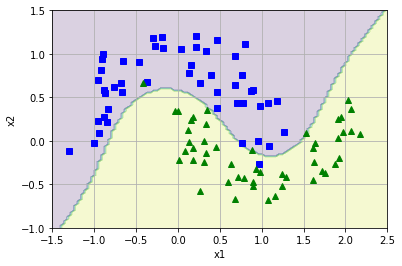

In [8]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### 유사도 특성
: 각 샘플이 특정 랜드마크와 얼마나 닮았는지(=거리)를 특성으로 추가하는 방법. 
- ex) 1차원 데이터에 대해 2개의 랜드마크와의 거리를 특성으로 추가하면 (원래 특성 제외)특성이 2개가 된다. -> 선형적 분류 가능해짐.
- 랜드마크 선택 방법 : 데이터 셋에 있는 모든 샘플 위치를 랜드마크로 설정한 뒤 훈련시킨다. 
- 단, 원래 데이터 셋이 n개의 특성, m개의 샘플로 이루어져있다고 할 때 유사도 특성을 이용할 경우 m개의 특성, m개의 샘플로 변환되어 훈련 세트가 클 경우 더 많은 특성이 생성된다.
- 책에서 유사도를 계산하는 함수로는 가우시안 방사 기저 함수(RBF; radial basis function)을 사용함.

### 가우시안 RBF 커널
- 유사도 방식에 rbf커널 트릭을 이용.

In [9]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001)) #gamma는 유사도 함수의 종 너비를 조절하는데 C와 마찬가지로 규제의 역할을 한다.
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

### 커널 선택
- 보통 선형 커널. LinearSVC가 SVC(kernel="linear")보다 훨씬 빠르다.
- 훈련 세트가 너무 크지 않다면 가우시안 RBF커널.
- 다른 훈련 데이터에 특화된 커널이 있다면 그 커널로. ex) 문자열 커널. 텍스트 문서나 DNA 서열을 분류할 때 사용.

### 계산복잡도
- LinearSVC
    + 선형 SVM을 위한 최적회된 알고리즘을 구현한 liblinear 라이브러리를 기반으로 한다. 
    + O(m * n). 훈련 샘플과 특성 수에 선형적으로 증가.
- SVC
    + 커널 트릭 알고리즘을 구현한 libsvm 라이브러리를 기반으로 한다. 
    + O(m^2 * n) ~ O(m^3 * n). 샘플 수가 엄청나게 많은 경우에는 훈련이 오래걸리지만 특성 수가 많은 경우에는 괜찮음.

## SVM 회귀
- SVC와는 달리 margin안에 최대한 많은 샘플이 위치하도록 하는 것이 목표. margin 바깥에 있는 샘플들이 마진 오류가 된다.
- 새로운 샘플이 추가되어도 그 샘플이 마진 안에 있다면 모델에 영향을 주지 않기 때문에 epsilon에 민감하지 않다고 한다.(epsilon-insensitive)

In [10]:
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [11]:
# 선형 svr
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5) # epsilon: 마진 폭 조정 
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [12]:
svm_reg.predict([[1.5]])

array([8.21549402])

In [13]:
# 비선형 svr
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
x0 = 1.5
y = 0.2 + 0.1 * x0 + 0.5 * x0**2
y

1.475

In [15]:
svm_poly_reg.predict([[1.5]])

array([1.37863424])

### 연습문제
8. 선형적으로 분리되는 데이터셋으로 SVC, LinearSVC, SGDClassifier 모델 훈련시키고 비교하기.

In [16]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [17]:
scaler = StandardScaler()
X_sclaed = scaler.fit_transform(X)

In [18]:
prac8_svm_clf = SVC(kernel="linear")
prac8_svm_clf.fit(X_sclaed,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
prac8_linsvm_clf = LinearSVC()
prac8_linsvm_clf.fit(X_sclaed,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [20]:
from sklearn.linear_model import SGDClassifier
prac8_sgd_clf = SGDClassifier()
prac8_sgd_clf.fit(X_sclaed, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

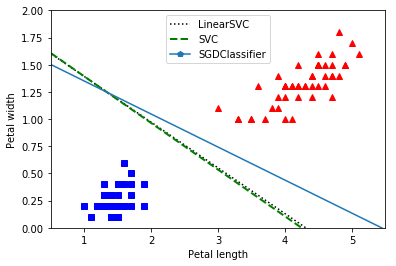

In [21]:
plt.plot(X[:,0][y==0], X[:,1][y==0], "bs")
plt.plot(X[:,0][y==1], X[:,1][y==1], "r^")

# 기울기, 절편 생성
w1 = -prac8_linsvm_clf.coef_[0, 0]/prac8_linsvm_clf.coef_[0, 1]
b1 = -prac8_linsvm_clf.intercept_[0]/prac8_linsvm_clf.coef_[0, 1]
w2 = -prac8_svm_clf.coef_[0, 0]/prac8_svm_clf.coef_[0, 1]
b2 = -prac8_svm_clf.intercept_[0]/prac8_svm_clf.coef_[0, 1]
w3 = -prac8_sgd_clf.coef_[0, 0]/prac8_sgd_clf.coef_[0, 1]
b3 = -prac8_sgd_clf.intercept_[0]/prac8_sgd_clf.coef_[0, 1]

# x=-10, 10 일 때 선 위의 점을 생성
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "g--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "p-", label="SGDClassifier")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.axis([0.5, 5.5, 0, 2])
plt.show()

9. MNIST 데이터셋에 SVM 훈련

In [22]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [23]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
lin_clf = LinearSVC(random_state=44)
lin_clf.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=44, tol=0.0001,
          verbose=0)

In [26]:
lin_pred = lin_clf.predict(X_train_scaled)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, lin_pred)

0.9202333333333333

In [28]:
svc_clf = SVC(random_state=44)
svc_clf.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=44, shrinking=True, tol=0.001,
    verbose=False)

In [29]:
svc_pred = svc_clf.predict(X_train_scaled)

In [30]:
accuracy_score(y_train, svc_pred)

0.9866333333333334

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {
    'gamma':reciprocal(0.001, 0.1),
    'C':uniform(1,10)
}

rnd_search_cv = RandomizedSearchCV(svc_clf, param_distributions, n_iter=30, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=5.662721401543578, gamma=0.03455716848703137 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=5.662721401543578, gamma=0.03455716848703137, total=144.5min
[CV] C=5.662721401543578, gamma=0.03455716848703137 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 144.5min remaining:    0.0s


[CV] .. C=5.662721401543578, gamma=0.03455716848703137, total=145.9min
[CV] C=5.662721401543578, gamma=0.03455716848703137 ..................
[CV] .. C=5.662721401543578, gamma=0.03455716848703137, total=139.3min
[CV] C=2.3732628817488566, gamma=0.043886557728846795 ................
[CV]  C=2.3732628817488566, gamma=0.043886557728846795, total=145.0min
[CV] C=2.3732628817488566, gamma=0.043886557728846795 ................
[CV]  C=2.3732628817488566, gamma=0.043886557728846795, total=143.5min
[CV] C=2.3732628817488566, gamma=0.043886557728846795 ................
[CV]  C=2.3732628817488566, gamma=0.043886557728846795, total=145.4min
[CV] C=1.3695621879305444, gamma=0.0014374996730040894 ...............
[CV]  C=1.3695621879305444, gamma=0.0014374996730040894, total=13.1min
[CV] C=1.3695621879305444, gamma=0.0014374996730040894 ...............
[CV]  C=1.3695621879305444, gamma=0.0014374996730040894, total=12.8min
[CV] C=1.3695621879305444, gamma=0.0014374996730040894 ...............
[CV]  

[CV] . C=10.565119980327184, gamma=0.009484278964680189, total=58.8min
[CV] C=6.59324918331834, gamma=0.0010943997388843038 .................
[CV] .. C=6.59324918331834, gamma=0.0010943997388843038, total=10.6min
[CV] C=6.59324918331834, gamma=0.0010943997388843038 .................
[CV] .. C=6.59324918331834, gamma=0.0010943997388843038, total=10.6min
[CV] C=6.59324918331834, gamma=0.0010943997388843038 .................
[CV] .. C=6.59324918331834, gamma=0.0010943997388843038, total=10.7min
[CV] C=5.271756400722156, gamma=0.004040106283404179 .................
[CV] .. C=5.271756400722156, gamma=0.004040106283404179, total=23.7min
[CV] C=5.271756400722156, gamma=0.004040106283404179 .................
[CV] .. C=5.271756400722156, gamma=0.004040106283404179, total=24.1min
[CV] C=5.271756400722156, gamma=0.004040106283404179 .................
[CV] .. C=5.271756400722156, gamma=0.004040106283404179, total=23.9min
[CV] C=6.173612486718838, gamma=0.0012845795379680632 ................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 5677.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=44,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=30, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017472DEC4E0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001746E54FDA0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [32]:
rnd_search_cv.best_score_

0.9677500000000001

In [33]:
rnd_search_cv.best_estimator_

SVC(C=6.706482727563968, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0011393271964916449, kernel='rbf', max_iter=-1, probability=False,
    random_state=44, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = rnd_search_cv.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

10. 캘리포니아 주택가격 데이터셋에 SVM 훈련

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [ ]:
scaler = Standar
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lin_clf = LinearSVC(random_state=44)
lin_clf.fit(X_train_sclaed)

In [ ]:
lin_pred = lin_clf.predict(X_train_sclaed)

In [ ]:
score_(y_train, lin_pred)

In [ ]:
svm_clf = SVC(random_state=44)
svm_clf.fit(X_train_scaled)

In [ ]:
svm_pred = svm_clf.predict(X_train_scaled)

In [ ]:
score_(y_train, svm_pred)

In [ ]:
ㅕㅑ어